# **AI Evaluation Intro**

## Why RAG Evaluation Matters

### The Challenge
Evaluating AI-based systems, particularly those involving generative AI, presents unique challenges that require a structured evaluation framework. Different system architectures demand different evaluation approaches.

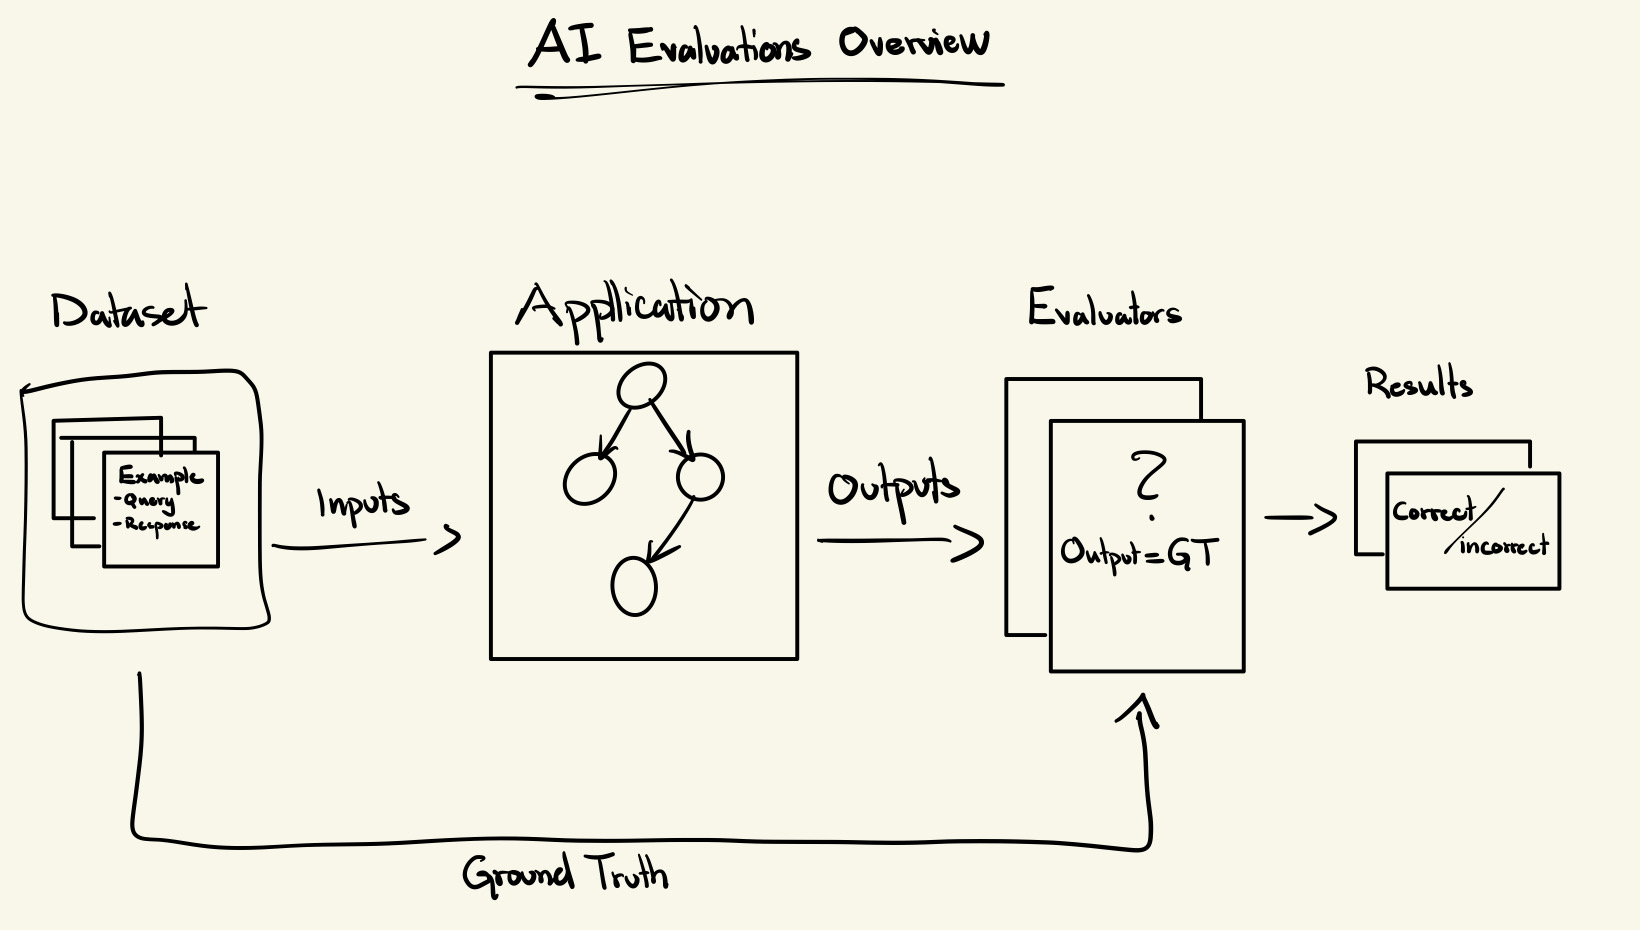

In [1]:
from IPython.display import Image, display
display(Image(filename='media/ai_eval_overview.jpg', width=1200))

### Depending on your system, you may want to deploy different evaluation strategies

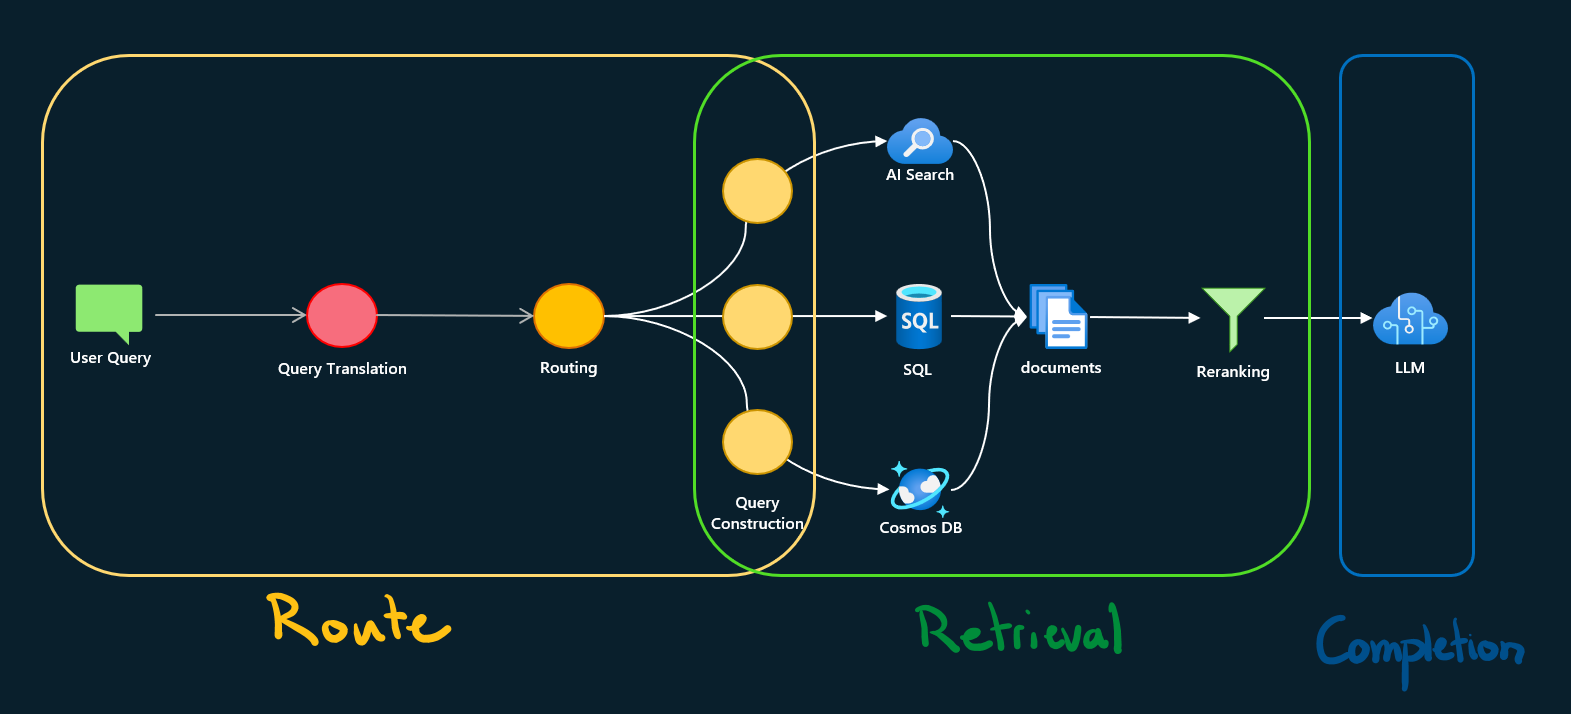

In [2]:
from IPython.display import Image, display
display(Image(filename='media/eval_strategies.png', width=1200))

## **RAG Evaluation Approach**

RAG (Retrieval-Augmented Generation) systems benefit from **component-level evaluation**:
- **Retrieval Quality**: Assessing whether the system retrieves the most relevant documents
- **Generation Quality**: Evaluating if the system generates accurate responses given the retrieved context

By testing each component separately, we can identify exactly where problems occur.

---

## **Synthetic Data Generation Strategy**

This repository addresses the challenge of **no human-labeled data** through controlled synthetic data generation.

### **Chunk-based Generation**
- Start with content chunks from your knowledge base
- For each chunk, find k=5 most similar chunks using k-NN (nearest neighbor search)
- Generate synthetic Q&A pairs with controlled parameters:
  - **`is_grounded`**: Controls if question should be answerable from the chunks
  - **`difficulty`**: Sets complexity level (Beginner, Intermediate, Advanced, Expert)
  - **`tone`**: Question style (Neutral, Friendly, Angry, etc.)
  - **`language`**: Multi-language support (English, Swedish, etc.)

### **Grounded vs Not-Grounded Questions**

**Grounded Questions** → Answer IS in the provided chunks
- Used to evaluate retrieval recall (can we find the right documents?)
- Used to evaluate generation quality (does the AI use the documents correctly?)

**Not-Grounded Questions** → Answer is NOT in the provided chunks
- Tests if the AI knows when to say "I don't know"
- Helps detect hallucination (making up answers)

---

## **Component-Level Evaluation**

### **1. Retrieval Evaluation** (Notebook 03)
- Uses **grounded questions only** (we know which document should be retrieved)
- Measures **Hit Rate** and **MRR** (Mean Reciprocal Rank)
- System should retrieve the source chunks used during generation
- Failed retrieval = search system needs improvement

### **2. Generation Evaluation** (Notebook 05)
- Tests with **both grounded and not-grounded questions**
- Uses **fixed context** (no retrieval) to isolate LLM performance
- **For grounded questions**: Verify AI uses only provided context (no hallucination)
- **For not-grounded questions**: Verify AI appropriately says "I don't have that information"
- Measures **Groundedness scores** using Azure AI evaluators

---

## **Note on Human-Labeled Data**

While this repository focuses on synthetic data generation, **human-labeled data remains the gold standard** for evaluation. Use synthetic data when:
- ✅ Human-labeled data is unavailable or expensive
- ✅ You need large volumes of test cases quickly
- ✅ Testing edge cases and failure modes systematically
- ✅ Initial system validation before human evaluation
- ✅ Continuous integration testing

---

## **Implementing the Evaluation Framework**

Now that we understand the theory behind RAG evaluation and our synthetic data approach, let's explore how to implement this in practice. The following notebooks provide a step-by-step guide through the entire process:

**📊 Data Generation & Validation**
1. **Notebook 01** - Generate synthetic questions using k-NN approach
2. **Notebook 02** - Validate synthetic data quality

**🔍 RAG System Evaluation**
3. **Notebook 03** - Evaluate retrieval performance (search quality)
4. **Notebook 04** - Generate AI responses with fixed context
5. **Notebook 05** - Evaluate generation performance (AI response quality)